In [2]:
import os
import matplotlib.pyplot as plt

from visual_graph_datasets.util import dynamic_import
from visual_graph_datasets.processing.base import ProcessingBase
from visual_graph_datasets.processing.molecules import MoleculeProcessing
from graph_attention_student.torch.megan import Megan

# Set matplotlib style to default
plt.style.use('default')

PATH = os.getcwd()
print('PATH: ', PATH)

PATH:  /media/ssd/Programming/graph_attention_student/graph_attention_student/scripts


In [3]:
MODEL_PATH = '/media/ssd/Programming/graph_attention_student/graph_attention_student/experiments/results/vgd_torch__megan__mutagenicity/try__16_10_2024__07_03__mXSN/rep00/model.ckpt'
print('MODEL_PATH: ', MODEL_PATH, os.path.exists(MODEL_PATH))

PROCESSING_PATH = '/media/ssd/.visual_graph_datasets/datasets/aqsoldb/process.py'
print('PROCESSING PATH: ', PROCESSING_PATH, os.path.exists(PROCESSING_PATH))

model = Megan.load(MODEL_PATH)
print('MODEL: ', type(model), model)

module = dynamic_import(PROCESSING_PATH)
processing: MoleculeProcessing = module.processing
print('PROCESSING: ', processing)

MODEL_PATH:  /media/ssd/Programming/graph_attention_student/graph_attention_student/experiments/results/vgd_torch__megan__mutagenicity/try__16_10_2024__07_03__mXSN/rep00/model.ckpt True
PROCESSING PATH:  /media/ssd/.visual_graph_datasets/datasets/aqsoldb/process.py True
MODEL:  <class 'graph_attention_student.torch.megan.Megan'> Megan(
  (lay_embedd): Linear(in_features=45, out_features=64, bias=True)
  (lay_transform_1): Linear(in_features=101, out_features=16, bias=True)
  (lay_transform_2): Linear(in_features=16, out_features=1, bias=False)
  (encoder_layers): ModuleList(
    (0-2): 3 x ParallelHeadAttention(
      (layers): ModuleList(
        (0-1): 2 x GraphAttentionLayerV2()
      )
      (lay_act): LeakyReLU(negative_slope=0.01)
    )
    (3): ParallelHeadAttention(
      (layers): ModuleList(
        (0-1): 2 x GraphAttentionLayerV2()
      )
      (lay_act): Identity()
    )
  )
  (lay_dropout_encoder): Dropout(p=0.0, inplace=False)
  (lay_pool): SumAggregation()
  (lay_pool_

PRED:  [ 1.2809806 -1.2039367]


/tmp/ipykernel_1762612/521890607.py:54: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


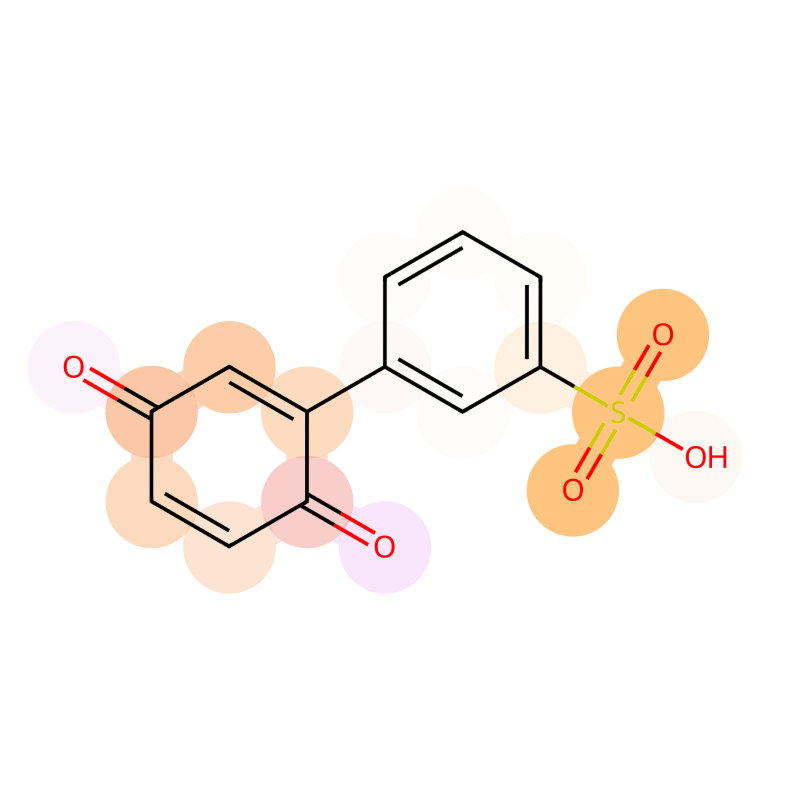

In [20]:
import tempfile
from graph_attention_student.torch.advanced import explain_value
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, to_rgba

ch_0 = LinearSegmentedColormap.from_list('blues', ['white', '#FFC57F'])
ch_1 = LinearSegmentedColormap.from_list('redss', ['white', '#E57FFF'])

#SMILES = 'C1=CC=C(C=C1)[N+](=O)[O-]'
#SMILES = 'C1=CC=C2C(=C1)C=CC=C2[N+](=O)[O-]'
#SMILES = 'C1=CC=C(C=C1)OC2=CC=CC(=C2)[N+](=O)[O-]'
#SMILES = '[O-][N+](C1C2C=CCC3C=2C(C(O)=CC=3)=CC=1)=O'
#SMILES = 'C1=CC=C(C=C1)N=NC2=CC=CC=C2'
#SMILES = 'C1=CC=C(C=C1)N=NC2=CC=CC=C2S(=O)(=O)O'
#SMILES = 'C1=CC=C(C=C1)N=NC2=CC(=CC=C2)S(=O)(=O)O'
#SMILES = 'C1=CC=C2C(=C1)C=CC=C2S(=O)(=O)O'
#SMILES = 'S(O[H])(=O)(=O)C1C(C2=NCC=C2)=CC=CC=1'
SMILES = 'O[S](=O)(=O)c1cccc(c1)c2cc(=O)ccc2=O'

fig, axs, info, graph = explain_value(
    value=SMILES,
    model=model,
    processing=processing,
    strategy='joint',
    color_maps=[ch_0, ch_1],
    radius=60,
    thickness=30,
)
print('PRED: ', info['graph_output'])
ax = axs[0]
show_spines = False

ax.spines['top'].set_visible(show_spines)
ax.spines['right'].set_visible(show_spines)
ax.spines['bottom'].set_visible(show_spines)
ax.spines['left'].set_visible(show_spines)
ax.axis('off')

# Selecting the axis-X making the bottom and top axes False.
plt.tick_params(axis='x', which='both', bottom=False,
                top=False, labelbottom=False)

# Selecting the axis-Y making the right and left axes False
plt.tick_params(axis='y', which='both', right=False,
                left=False, labelleft=False)

# https://stackoverflow.com/questions/4581504
fig.patch.set_facecolor((0, 0, 0, 0))
fig.patch.set_visible(False)

ax.patch.set_facecolor((0, 0, 0, 0))
ax.patch.set_visible(False)

fig.show()
fig.savefig('explanation.png', bbox_inches='tight', pad_inches=0, transparent=True)
